In [115]:
%matplotlib inline
import os
import sys
import wkbl
import glob
import cfalcon
import numpy as np
import ConfigParser
from py_unsio import *
import matplotlib as mpl
from numpy import exp, sqrt
import matplotlib.pyplot as plt
from scipy.special  import  gamma
from scipy.integrate  import  quad
from scipy.optimize import curve_fit
from sklearn.neighbors import KDTree
from scipy.stats import rv_continuous
import pynbody
import wkbl
import wkbl.astro.nbody_essentials as nbe
import warnings
warnings.filterwarnings('ignore')
CF =cfalcon.CFalcon()
from matplotlib import rc
import datetime
from scipy.misc import derivative
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


In [2]:
colors = ['#1f77b4', '#ff7f0e','#2ca02c','#d62728', '#9467bd',
          '#8c564b', '#e377c2','k','#bcbd22', '#17becf','#ffffff']

In [3]:
fi =  open('all.txt')
Bolson1 = []
Bolson2 = []
Cuba1 = []
Cuba2 = []
Mochima3 = []
Mochima5 = []
Turbach2 = []
Turbach5 = []

M_dm = []
M_st = []
M_dm0 = []
M_st0 = []
for line in fi:
    row = line.split(' ')

    if row[0][0]=='#':
        continue
    if len(row)<11:
        continue
    M_dm.append(float(row[7]))
    M_st.append(float(row[8]))
    try:
        if float(row[10])>10:
            M_dm0.append(float(row[10]))
            M_st0.append(float(row[9]))
    except:
        print "coco"

    
    if row[0]=='Bolson' and row[1]=='1':
        for i in range(2,len(row[:-1])):
            try:
                Bolson1.append(float(row[i]))
            except:
                continue
    if row[0]=='Bolson' and row[1]=='2':
        for i in range(2,len(row[:-1])):
            try:
                Bolson2.append(float(row[i]))
            except:
                continue
    if row[0]=='Cuba' and row[1]=='1':
        for i in range(2,len(row[:-1])):
            try:
                Cuba1.append(float(row[i]))
            except:
                continue
    if row[0]=='Cuba' and row[1]=='2':
        for i in range(2,len(row[:-1])):
            try:
                Cuba2.append(float(row[i]))
            except:
                continue
    if row[0]=='Mochima' and row[1]=='3':
        for i in range(2,len(row[:-1])):
            try:
                Mochima3.append(float(row[i]))
            except:
                continue
    if row[0]=='Mochima' and row[1]=='5':
        for i in range(2,len(row[:-1])):
            try:
                Mochima5.append(float(row[i]))
            except:
                continue
    if row[0]=='Turbach' and row[1]=='2':
        for i in range(2,len(row[:-1])):
            try:
                Turbach2.append(float(row[i]))
            except:
                continue
    if row[0]=='Turbach' and row[1]=='5':
        for i in range(2,len(row[:-1])):
            try:
                Turbach5.append(float(row[i]))
            except:
                continue

    

        


print Turbach5

coco
[229.8, 1142000000000.0, 230.5, 1150000000000.0, 230.3, 948700000000.0, 62730000000.0, 139400000000.0, 303000000000.0, 1620000000000.0]


In [4]:
Bolson1=np.array(Bolson1)
Bolson2=np.array(Bolson2)
Cuba1=np.array(Cuba1)
Cuba2=np.array(Cuba2)
Mochima3=np.array(Mochima3)
Mochima5=np.array(Mochima5)
Turbach2=np.array(Turbach2)
Turbach5=np.array(Turbach5)



b1r=Bolson1[np.array([0,2,4])]
b2r=Bolson2[np.array([0,2,4])]
c1r=Cuba1[np.array([0,2,4])]
c2r=Cuba2[np.array([0,2,4])]
m3r=Mochima3[np.array([0,2,4])]
m5r=Mochima5[np.array([0,2,4])]
t2r=Turbach2[np.array([0,2,4])]
t5r=Turbach5[np.array([0,2,4])]


print t5r

[229.8 230.5 230.3]


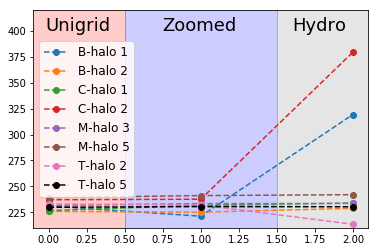

In [5]:
fig, ax = plt.subplots()
ax.set_xlim([-0.10,2.1])
ax.set_ylim([210,420])
ax.axvspan(-1, 0.5, alpha=0.2, color='red')
ax.axvspan(0.5, 1.5, alpha=0.2, color='blue')
ax.axvspan(1.5, 2.5, alpha=0.2, color='gray')
ax.text(-0.02,400,'Unigrid',fontsize=18)
ax.text(0.75,400,'Zoomed',fontsize=18)
ax.text(1.6,400,'Hydro',fontsize=18)

ax.plot(b1r,'o--',label='B-halo 1',c=colors[0])
ax.plot(b2r,'o--',label='B-halo 2',c=colors[1])
ax.plot(c1r,'o--',label='C-halo 1',c=colors[2])
ax.plot(c2r,'o--',label='C-halo 2',c=colors[3])
ax.plot(m3r,'o--',label='M-halo 3',c=colors[4])
ax.plot(m5r,'o--',label='M-halo 5',c=colors[5])
ax.plot(t2r,'o--',label='T-halo 2',c=colors[6])
ax.plot(t5r,'o--',label='T-halo 5',c=colors[7])


legend = ax.legend(loc='center left', ncol=1, shadow=False, fontsize=12)

In [80]:
# Moster et all
def M_1(z):
    M10 ,M11 = 11.590, 1.195
    log = M10 + M11*(z / (z+1))
    return 10**(log)

def N(z):
    N10 ,N11 = 0.0351, -0.0247
    return N10 + N11*(z / (z+1))


def beta(z):
    B10 ,B11 = 1.376, -0.826
    return B10 + B11*(z / (z+1))


def gamma(z):
    G10 ,G11 = 0.608, 0.329
    return G10 + G11*(z / (z+1))

def mm(M,z=0):
    z=float(z)
    one = ( M / M_1(z))**(-beta(z))
    two = ( M / M_1(z))**gamma(z)
    return 2*N(z) * M / (one +two)

def alpha(m):
    return 0.15 / np.log10(m)



In [81]:
M = np.logspace(10,15,50)
m = mm(M)
al = np.sqrt(m)#alpha(m)

In [82]:
for i in range(10):
    print mm(1e12,z=i)

34275151856.1
20385998814.2
14535446088.1
12202378926.6
10988628513.8
10249356432.4
9752520402.49
9395714825.61
9127005901.28
8917304389.54


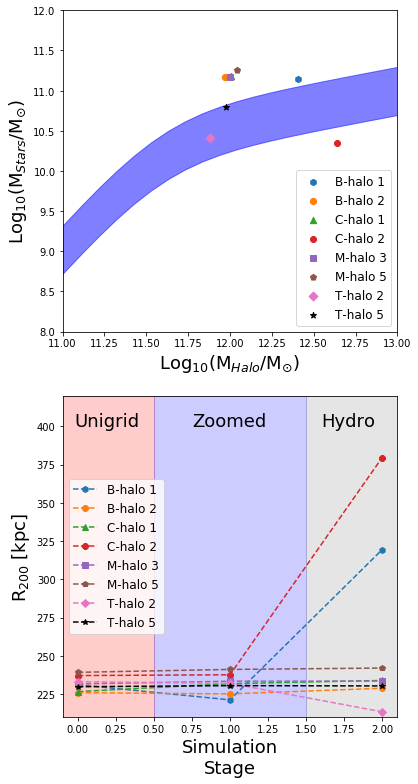

In [8]:
fig, [ax1,ax] = plt.subplots(2,1, figsize = [6,13])
ax1.set_xlim(11,13)
ax1.set_ylim(8,12)

ax1.fill_between(np.log10(M), np.log10(m)+.3,np.log10(m)-.3,color='blue',alpha=0.5 )
markers = ['h','o','^','8','s','p','D','*']
labels = ['B-halo 1', 'B-halo 2','C-halo 1',
          'C-halo 2','M-halo 3','M-halo 5',
          'T-halo 2', 'T-halo 5']
curver = [b1r, b2r, c1r, c2r, m3r, m5r,t2r,t5r]
ax1.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax1.set_ylabel(r'Log$_{10}$(M$_{Stars}$/M$_{\odot}$)',fontsize=18)

for i in range(len(markers)):
    ax1.scatter(np.log10(M_dm)[i],np.log10(M_st)[i],
               marker=markers[i],color = colors[i],
               label = labels[i],s=40)

    
ax.set_xlim([-0.10,2.1])
ax.set_ylim([210,420])
ax.axvspan(-1, 0.5, alpha=0.2, color='red')
ax.axvspan(0.5, 1.5, alpha=0.2, color='blue')
ax.axvspan(1.5, 2.5, alpha=0.2, color='gray')
ax.text(-0.02,400,'Unigrid',fontsize=18)
ax.text(0.75,400,'Zoomed',fontsize=18)
ax.text(1.6,400,'Hydro',fontsize=18)

for i in range(len(curver)):
    ax.plot(curver[i],'--' + markers[i],
            c=colors[i],label=labels[i])
ax.set_xlabel("Simulation\nStage",fontsize=18)
ax.set_ylabel(r'R$_{200}$ [kpc]',fontsize=18)
    
legend = ax1.legend(loc='lower right', ncol=1, shadow=False, fontsize=12)
legend = ax.legend(loc='center left', ncol=1, shadow=False, fontsize=12)

In [9]:
print N(0)
M0 = np.logspace(10,14,50)
m0 = mm(M0,z=100)
al0 = np.sqrt(m0)


0.0351


In [10]:
print M_dm0

[761000000000.0, 302000000000.0, 230000000000.0, 273000000000.0, 375000000000.0, 331000000000.0, 303000000000.0]


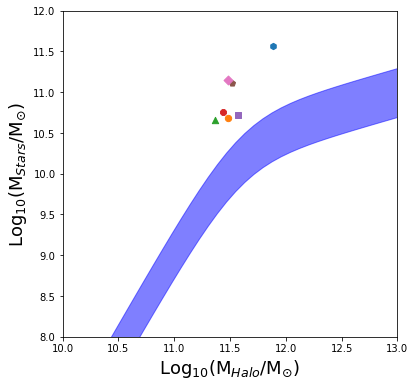

In [11]:
colors2 = ['#1f77b4', '#ff7f0e','#2ca02c', '#9467bd',
          '#8c564b', '#e377c2','k','#bcbd22', '#17becf']
fig, ax1 = plt.subplots( figsize = [6,6])
ax1.set_xlim(10,13)
ax1.set_ylim(8,12)

ax1.fill_between(np.log10(M0), np.log10(m0)+.3,np.log10(m0)-.3,color='blue',alpha=0.5 )
markers0 = ['h','o','^','s','p','D','*']
labels0 = ['B-halo 1', 'B-halo 2','C-halo 1'
          ,'M-halo 3','M-halo 5',
          'T-halo 2', 'T-halo 5']
curver = [b1r, b2r, c1r, c2r, m3r, m5r,t2r,t5r]
ax1.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax1.set_ylabel(r'Log$_{10}$(M$_{Stars}$/M$_{\odot}$)',fontsize=18)

for i in range(len(markers0)):
    ax1.scatter(np.log10(M_dm0)[i],np.log10(M_st0)[i],
               marker=markers[i],color = colors[i],
               label = labels[i],s=40)

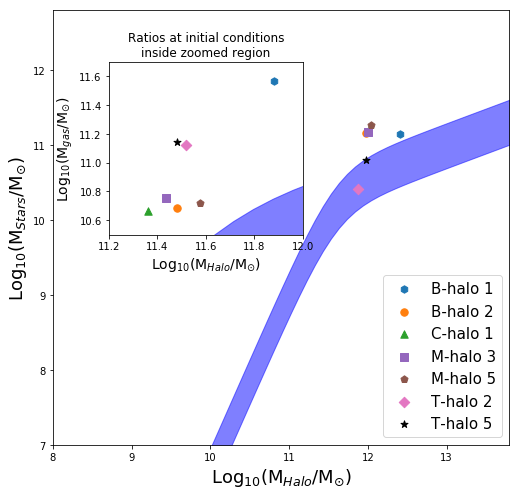

In [12]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes
fig = plt.figure(figsize=(18, 8),facecolor='white')
ax = fig.add_subplot(121)
ax.set_xlim(8,13.8)
ax.set_ylim(7,12.8)


# the main axes is subplot(111) by default
plt.fill_between(np.log10(M), np.log10(m)+.3,np.log10(m)-.3,color='blue',alpha=0.5 )
#plt.axis([0, 1, 1.1*np.amin(s), 2*np.amax(s)])
curver = [b1r, b2r, c1r, c2r, m3r, m5r,t2r,t5r]
ax.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax.set_ylabel(r'Log$_{10}$(M$_{Stars}$/M$_{\odot}$)',fontsize=18)
ax2 = plt.axes([.168, .49, .15, .3])
ax2.set_ylabel(r'Log$_{10}$(M$_{gas}$/M$_{\odot}$)',fontsize=14)
ax2.set_title("Ratios at initial conditions\ninside zoomed region")
ax2.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=14)
for i in range(len(markers)):
    if i==3:
        continue
    ax.scatter(np.log10(M_dm)[i],np.log10(M_st)[i],
               marker=markers[i],color = colors[i],
               label = labels[i],s=55)
for i in range(len(markers0)):
    ax2.scatter(np.log10(M_dm0)[i],np.log10(M_st0)[i],
               marker=markers0[i],color = colors2[i],
               label = labels0[i],s=55)

ax2.set_xlim(11.2,12)
ax2.set_ylim(10.5,11.7)    
ax2.fill_between(np.log10(M0), np.log10(m0)+.3,np.log10(m0)-.3,color='blue',alpha=0.5 )
    
legend = ax.legend(loc='lower right', ncol=1, shadow=False, fontsize=15)

In [13]:
fil = open('all_ratios.txt')
labelss = []
M_dm = np.array([])
M_baryons = np.array([])
M_dm0 = np.array([])
M_baryons0 = np.array([])

for line in fil:
    row = line.split(' ')
    if len(row)<6:
        continue
    if row[0][0]=='#':
        continue
    labelss.append(row[0]+row[1])
    M_dm0 = np.append(M_dm0,float(row[2]))
    M_baryons0 = np.append(M_baryons0,float(row[3]))
    M_dm = np.append(M_dm,float(row[4]))    
    M_baryons = np.append(M_baryons0,float(row[5]))


8


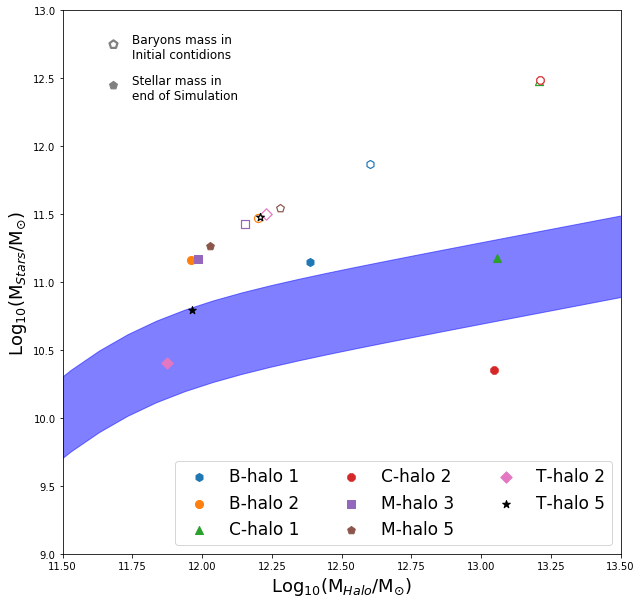

In [14]:
fig, ax1 = plt.subplots(figsize = [10,10])
ax1.set_xlim(11.5,13.5)
ax1.set_ylim(9,13)

ax1.fill_between(np.log10(M), np.log10(m)+.3,np.log10(m)-.3,color='blue',alpha=0.5 )
markers = ['h','o','^','8','s','p','D','*']
curver = [b1r, b2r, c1r, c2r, m3r, m5r,t2r,t5r]
ax1.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax1.set_ylabel(r'Log$_{10}$(M$_{Stars}$/M$_{\odot}$)',fontsize=18)


for i in range(len(markers)):
    ax1.scatter(np.log10(M_dm)[i],np.log10(M_st)[i],
               marker=markers[i],color = colors[i],
               label = labels[i],s=65)
    
print len(M_baryons0)
    
for i in range(len(markers)):
    ax1.scatter(np.log10(M_dm0)[i],np.log10(M_baryons0)[i],
               marker=markers[i],color = colors[i],
                lw=1.2, facecolor='w', s=65)
    
ax1.text(11.75,12.65,"Baryons mass in\nInitial contidions",fontsize=12)
ax1.text(11.75,12.35,"Stellar mass in\nend of Simulation",fontsize=12)

ax1.scatter(11.68,12.75,marker=markers[5],color = 'gray',
                lw=2.2, facecolor='w',s=70)
ax1.scatter(11.68,12.45,marker=markers[5],color = 'gray',s=70)
legend = ax1.legend(loc='lower right', ncol=3, shadow=False,
                    fontsize=17)

In [15]:
header = np.array(['M200(dm)','M97(dm)', 'M200(st)', 'M97(st)', 'MF2(st)'])
dat = np.array([ [9.15449e+11, 1.05187e+12, 1.44978e+11, 1.48395e+11, 4.8234e+10],
 [1.01831e+12, 1.11248e+12, 1.56697e+11, 1.5721e+11, 1.1953e+11],
 [9.70832e+11, 1.12731e+12, 1.49212e+11, 1.57597e+11, 5.40642e+10],
 [8.85077e+11, 9.52229e+11, 1.41306e+11, 1.4148e+11, 6.05766e+10],
 [9.04764e+11, 9.71617e+11, 1.37911e+11, 1.37962e+11, 1.32006e+11],
 [2.48554e+12, 2.68252e+12, 3.08322e+11, 3.08481e+11, 1.57559e+11]],dtype=float) 



labels = np.array(["Andorra1","Andorra3","Turbach5","Namibia2","Namibia3","DF3"])


dat_fb = np.array([ [2.11523e+12, 2.23495e+12, 1.16873e+11, 1.16882e+11, 1.03105e+11 ],
                    [9.45996e+11, 1.06259e+12, 1.33956e+11, 1.34045e+11, 8.54951e+10],
                    [8.97454e+11, 9.66341e+11, 1.31392e+11, 1.31709e+11, 2.45328e+10],
                    [9.70012e+11, 1.14089e+12, 1.48266e+11, 1.54905e+11, 3.76573e+10]
                  ],dtype=float) 



### inial = dm, baryonic(GAS)
initial = np.array([[1.50e+12, 2.79e+11],
                    [1.43e+12, 2.66e+11],
                    [1.58e+12, 2.94e+11],
                    [1.13e+12, 2.11e+11],
                    [1.25e+12, 2.33e+11],
                    [3.29e+12, 6.12e+11]
                   ],dtype=float)
no_disc_initial = np.array([[3.99e+12, 7.37e+11],
                            [1.44e+12, 2.68e+11],
                            [1.62e+13, 3.04e+12],
                            [1.43e+12, 2.67e+11],
                            [1.90e+12, 3.53e+11]  
                           ],dtype=float)

no_disc_lable = np.array(["Bolson1","Andorra2","Cuba2","Mochima3", "Mochima5"])

In [16]:
dat[1:6,0]

array([1.01831e+12, 9.70832e+11, 8.85077e+11, 9.04764e+11, 2.48554e+12])

12.325357597384812 11.067714192039755


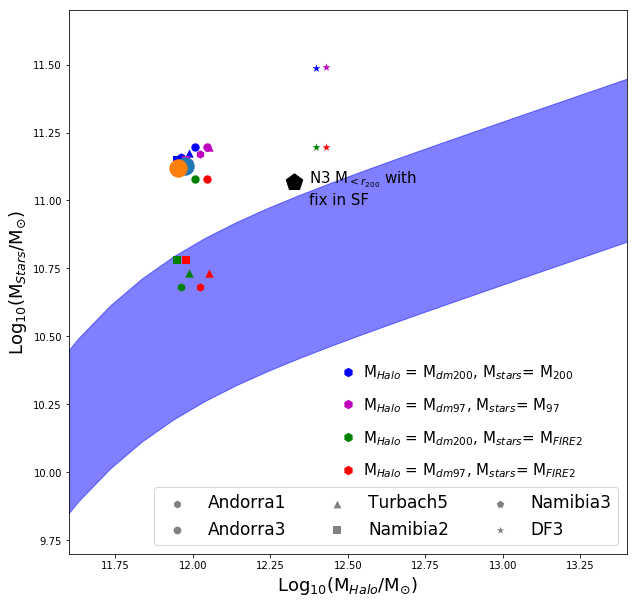

In [17]:
fig, ax1 = plt.subplots(figsize = [10,10])
ax1.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax1.set_ylabel(r'Log$_{10}$(M$_{Stars}$/M$_{\odot}$)',fontsize=18)
ax1.set_xlim(11.6,13.4)
ax1.set_ylim(9.7,11.7)
markers0 = ['h','o','^','s','p','*']
ax1.fill_between(np.log10(M), np.log10(m)+.3,np.log10(m)-.3,color='blue',alpha=0.5 )

for i in range(len(markers0)):
    ax1.scatter(np.log10(dat[i,0]),np.log10(dat[i,2]),marker=markers0[i], c='b',s=70,lw=0)
    ax1.scatter(np.log10(dat[i,0]),np.log10(dat[i,3])+100,marker=markers0[i], c='gray',s=60,lw=0,label=labels[i])
    ax1.scatter(np.log10(dat[i,0]),np.log10(dat[i,4]),marker=markers0[i], c='g',s=70,lw=0)
    ax1.scatter(np.log10(dat[i,1]),np.log10(dat[i,3]),marker=markers0[i], c='m',s=70,lw=0)
    ax1.scatter(np.log10(dat[i,1]),np.log10(dat[i,4]),marker=markers0[i], c='r',s=70,lw=0)

ax1.scatter(np.log10(dat_fb[0,0]),np.log10(dat_fb[0,2]),marker="p",s=300,c='k')
ax1.scatter(np.log10(dat_fb[1,0]),np.log10(dat_fb[1,2]),marker="o",s=300)
ax1.scatter(np.log10(dat_fb[2,0]),np.log10(dat_fb[2,2]),marker="o",s=300)

ax1.text(np.log10(dat_fb[0,0])+0.05,np.log10(dat_fb[0,2])-0.07,"N3 M$_{<r_{200}}$ with \nfix in SF",fontsize=15)

print np.log10(dat_fb[0,0]),np.log10(dat_fb[0,2])

ax1.text(12.55,10.35,r'M$_{Halo}$ = M$_{dm200}$, M$_{stars}$= M$_{200}$',fontsize=15)
ax1.text(12.55,10.23,r'M$_{Halo}$ = M$_{dm97}$, M$_{stars}$= M$_{97}$',fontsize=15)
ax1.text(12.55,10.11,r'M$_{Halo}$ = M$_{dm200}$, M$_{stars}$= M$_{FIRE2}$',fontsize=15)
ax1.text(12.55,9.99,r'M$_{Halo}$ = M$_{dm97}$, M$_{stars}$= M$_{FIRE2}$',fontsize=15)

#ax1.text(12.1,9.5,'M$_{200}$',fontsize=35)

ax1.scatter(12.5,10.37,marker=markers[0],color = 'b',lw=0,s=90)
ax1.scatter(12.5,10.25,marker=markers[0],color = 'm',lw=0,s=90)
ax1.scatter(12.5,10.13,marker=markers[0],color = 'g',lw=0,s=90)
ax1.scatter(12.5,10.01,marker=markers[0],color = 'r',lw=0,s=90)

    
legend = ax1.legend(loc='lower right', ncol=3, shadow=False,
                    fontsize=17)

12.325357597384812 11.067714192039755


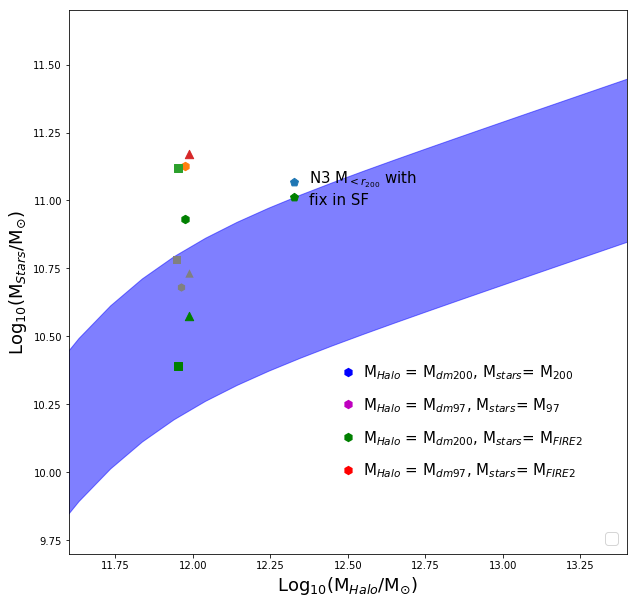

In [18]:
fig, ax1 = plt.subplots(figsize = [10,10])
ax1.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax1.set_ylabel(r'Log$_{10}$(M$_{Stars}$/M$_{\odot}$)',fontsize=18)
ax1.set_xlim(11.6,13.4)
ax1.set_ylim(9.7,11.7)
markers0 = ['h','o','^','s','p','*']
ax1.fill_between(np.log10(M), np.log10(m)+.3,np.log10(m)-.3,color='blue',alpha=0.5 )
index = [0,2,3,4]
for i in index:
    ax1.scatter(np.log10(dat[i,0]),np.log10(dat[i,2]),marker=markers0[i], c='white',s=70,lw=1)
    #ax1.scatter(np.log10(dat[i,0]),np.log10(dat[i,3])+100,marker=markers0[i], c='gray',s=60,lw=0,label=labels[i])
    ax1.scatter(np.log10(dat[i,0]),np.log10(dat[i,4]),marker=markers0[i], c='gray',s=70,lw=0)
    #ax1.scatter(np.log10(dat[i,1]),np.log10(dat[i,3]),marker=markers0[i], c='gray',s=70,lw=0)
    #ax1.scatter(np.log10(dat[i,1]),np.log10(dat[i,4]),marker=markers0[i], c='gray',s=70,lw=0)

ax1.scatter(np.log10(dat_fb[0,0]),np.log10(dat_fb[0,2]),marker="p",s=70)
ax1.scatter(np.log10(dat_fb[1,0]),np.log10(dat_fb[1,2]),marker="h",s=70)
ax1.scatter(np.log10(dat_fb[2,0]),np.log10(dat_fb[2,2]),marker="s",s=70)
ax1.scatter(np.log10(dat_fb[3,0]),np.log10(dat_fb[3,2]),marker="^",s=70)

ax1.scatter(np.log10(dat_fb[0,0]),np.log10(dat_fb[0,4]),marker="p",s=70,c='g')
ax1.scatter(np.log10(dat_fb[1,0]),np.log10(dat_fb[1,4]),marker="h",s=70,c='g')
ax1.scatter(np.log10(dat_fb[2,0]),np.log10(dat_fb[2,4]),marker="s",s=70,c='g')
ax1.scatter(np.log10(dat_fb[3,0]),np.log10(dat_fb[3,4]),marker="^",s=70,c='g')

ax1.text(np.log10(dat_fb[0,0])+0.05,np.log10(dat_fb[0,2])-0.07,"N3 M$_{<r_{200}}$ with \nfix in SF",fontsize=15)

print np.log10(dat_fb[0,0]),np.log10(dat_fb[0,2])

ax1.text(12.55,10.35,r'M$_{Halo}$ = M$_{dm200}$, M$_{stars}$= M$_{200}$',fontsize=15)
ax1.text(12.55,10.23,r'M$_{Halo}$ = M$_{dm97}$, M$_{stars}$= M$_{97}$',fontsize=15)
ax1.text(12.55,10.11,r'M$_{Halo}$ = M$_{dm200}$, M$_{stars}$= M$_{FIRE2}$',fontsize=15)
ax1.text(12.55,9.99,r'M$_{Halo}$ = M$_{dm97}$, M$_{stars}$= M$_{FIRE2}$',fontsize=15)

#ax1.text(12.1,9.5,'M$_{200}$',fontsize=35)

ax1.scatter(12.5,10.37,marker=markers[0],color = 'b',lw=0,s=90)
ax1.scatter(12.5,10.25,marker=markers[0],color = 'm',lw=0,s=90)
ax1.scatter(12.5,10.13,marker=markers[0],color = 'g',lw=0,s=90)
ax1.scatter(12.5,10.01,marker=markers[0],color = 'r',lw=0,s=90)

    
legend = ax1.legend(loc='lower right', ncol=3, shadow=False,
                    fontsize=17)

In [19]:
dat_fb = np.array([[1.2332e+13, 1.3801e+13, 2.97611e+10, 2.97992e+10, 1.20406e+10],
                   [1.52567e+12, 1.01524e+13, 9.57062e+10, 9.83415e+10, 2.34496e+10],
                   [5.83868e+10, 6.48282e+10, 1.22213e+07, 1.22213e+07, 3.76499e+06],
                   [8.26924e+11, 9.17074e+11, 4.16571e+10, 4.1719e+10, 1.01645e+10],
                   [1.07656e+12, 1.22943e+12, 7.03344e+10 ,7.17408e+10, 5.37581e+10],
                   [1.07814e+12, 1.2297e+12, 4.77742e+10, 4.94775e+10, 1.2554e+10]
                  ],dtype=float)

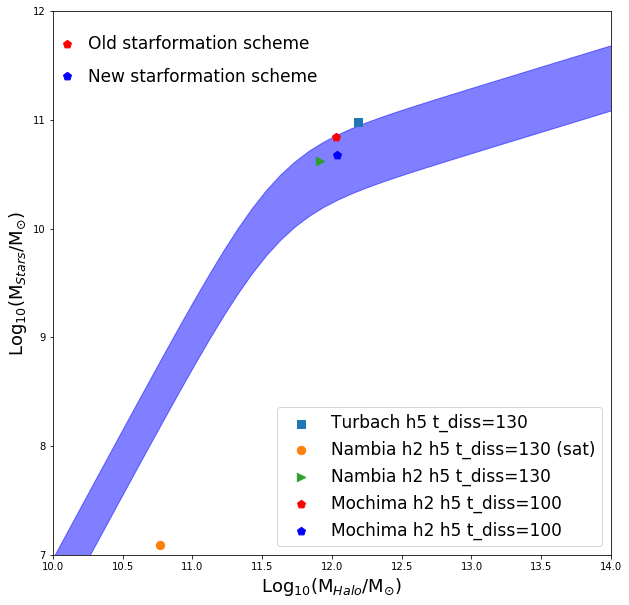

In [20]:
fig, ax1 = plt.subplots(figsize = [10,10])
ax1.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax1.set_ylabel(r'Log$_{10}$(M$_{Stars}$/M$_{\odot}$)',fontsize=18)
ax1.set_xlim(10,14.)
ax1.set_ylim(7,12)
markers0 = ['h','o','^','s','p','*']
ax1.fill_between(np.log10(M), np.log10(m)+.3,np.log10(m)-.3,color='blue',alpha=0.5 )
index = [0,2,3,4]
#for i in index:
#    ax1.scatter(np.log10(dat[i,0]),np.log10(dat[i,2]),marker=markers0[i], c='white',s=70,lw=1)
#    ax1.scatter(np.log10(dat[i,0]),np.log10(dat[i,3])+100,marker=markers0[i], c='gray',s=60,lw=0,label=labels[i])
#    ax1.scatter(np.log10(dat[i,0]),np.log10(dat[i,4]),marker=markers0[i], c='gray',s=70,lw=0)
#    ax1.scatter(np.log10(dat[i,1]),np.log10(dat[i,3]),marker=markers0[i], c='gray',s=70,lw=0)
#    ax1.scatter(np.log10(dat[i,1]),np.log10(dat[i,4]),marker=markers0[i], c='gray',s=70,lw=0)

ax1.scatter(np.log10(dat_fb[1,0]),np.log10(dat_fb[1,2]),marker="s",s=70,label='Turbach h5 t_diss=130')
ax1.scatter(np.log10(dat_fb[2,0]),np.log10(dat_fb[2,2]),marker="o",s=70,label='Nambia h2 h5 t_diss=130 (sat)')
ax1.scatter(np.log10(dat_fb[3,0]),np.log10(dat_fb[3,2]),marker=">",s=70,label='Nambia h2 h5 t_diss=130')
ax1.scatter(np.log10(dat_fb[4,0]),np.log10(dat_fb[4,2]),marker="p",c='r',s=70,label='Mochima h2 h5 t_diss=100')
ax1.scatter(np.log10(dat_fb[5,0]),np.log10(dat_fb[5,2]),marker="p",c='b',s=70,label='Mochima h2 h5 t_diss=100')

#ax1.scatter(np.log10(dat_fb[1,0]),np.log10(dat_fb[1,2]),marker="h",s=70,label='t_diss=11')
#ax1.scatter(np.log10(dat_fb[2,0]),np.log10(dat_fb[2,2]),marker="s",s=70,label='t_diss=12')
ax1.scatter(10.1,11.7,marker="p",c='r',s=70)
ax1.text(10.25,11.65,"Old starformation scheme",fontsize=17)
ax1.scatter(10.1,11.4,marker="p",c='b',s=70)
ax1.text(10.25,11.35,"New starformation scheme",fontsize=17)


    
legend = ax1.legend(loc='lower right', ncol=1, shadow=False,
                    fontsize=17)

In [21]:
print  1e12, 10**12.3

1e+12 1.99526231497e+12


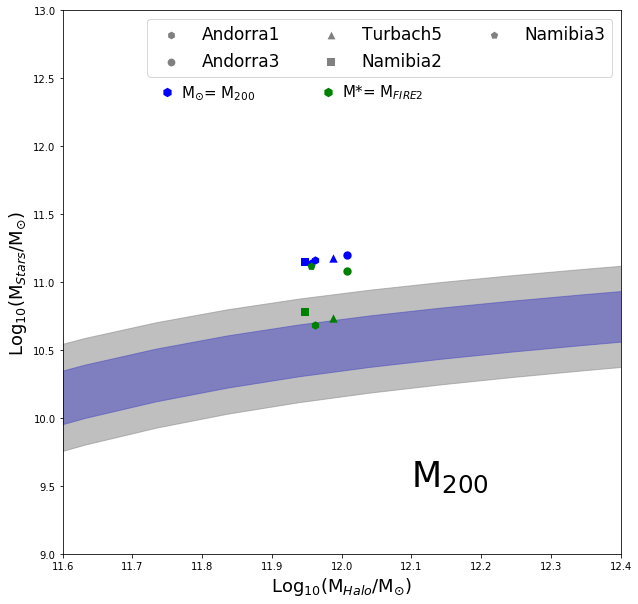

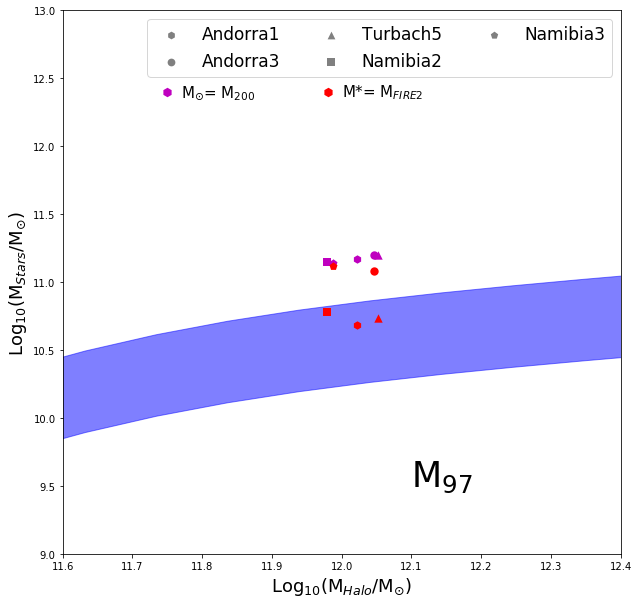

In [22]:
fig, ax1 = plt.subplots(figsize = [10,10])
ax1.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax1.set_ylabel(r'Log$_{10}$(M$_{Stars}$/M$_{\odot}$)',fontsize=18)
ax1.set_xlim(11.6,12.4)
ax1.set_ylim(9,13)
markers0 = ['h','o','^','s','p']
ax1.fill_between(np.log10(M), np.log10(m)+(1./np.log10(np.sqrt(m))),
                 np.log10(m)-(1./np.log10(np.sqrt(m))),color='blue',alpha=0.5 )
ax1.fill_between(np.log10(M), np.log10(m)+(2./np.log10(np.sqrt(m))),
                 np.log10(m)-(2./np.log10(np.sqrt(m))),color='gray',alpha=0.5 )
for i in range(len(markers0)):
    ax1.scatter(np.log10(dat[i,0]),np.log10(dat[i,2]),marker=markers0[i], c='b',s=70,lw=0)
    ax1.scatter(np.log10(dat[i,0]),np.log10(dat[i,3])+100,marker=markers0[i], c='gray',s=60,lw=0,label=labels[i])
    ax1.scatter(np.log10(dat[i,0]),np.log10(dat[i,4]),marker=markers0[i], c='g',s=70,lw=0)

ax1.text(12.,12.366,"M*"+r'= M$_{FIRE2}$',fontsize=15)
ax1.text(11.77,12.366,r'M$_{\odot}$= M$_{200}$',fontsize=15)
ax1.text(12.1,9.5,'M$_{200}$',fontsize=35)

ax1.scatter(11.75,12.4,marker=markers[0],color = 'b',lw=0,s=90)
ax1.scatter(11.98,12.4,marker=markers[0],color = 'g',lw=0,s=90)
    
legend = ax1.legend(loc='upper right', ncol=3, shadow=False,
                    fontsize=17)

########################################################################
fig, ax1 = plt.subplots(figsize = [10,10])
ax1.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax1.set_ylabel(r'Log$_{10}$(M$_{Stars}$/M$_{\odot}$)',fontsize=18)
ax1.set_xlim(11.6,12.4)
ax1.set_ylim(9,13)
markers0 = ['h','o','^','s','p']
ax1.fill_between(np.log10(M), np.log10(m)+.3,np.log10(m)-.3,color='blue',alpha=0.5 )
for i in range(len(markers0)):
    ax1.scatter(np.log10(dat[i,1]),np.log10(dat[i,3]),marker=markers0[i], c='m',s=70,lw=0)
    ax1.scatter(np.log10(dat[i,1]),np.log10(dat[i,3])+100,marker=markers0[i], c='gray',s=60,lw=0,label=labels[i])
    ax1.scatter(np.log10(dat[i,1]),np.log10(dat[i,4]),marker=markers0[i], c='r',s=70,lw=0)

ax1.text(12.,12.366,"M*"+r'= M$_{FIRE2}$',fontsize=15)
ax1.text(11.77,12.366,r'M$_{\odot}$= M$_{200}$',fontsize=15)
ax1.text(12.1,9.5,'M$_{97}$',fontsize=35)

ax1.scatter(11.75,12.4,marker=markers[0],color = 'm',lw=0,s=90)
ax1.scatter(11.98,12.4,marker=markers[0],color = 'r',lw=0,s=90)
    
legend = ax1.legend(loc='upper right', ncol=3, shadow=False,
                    fontsize=17)



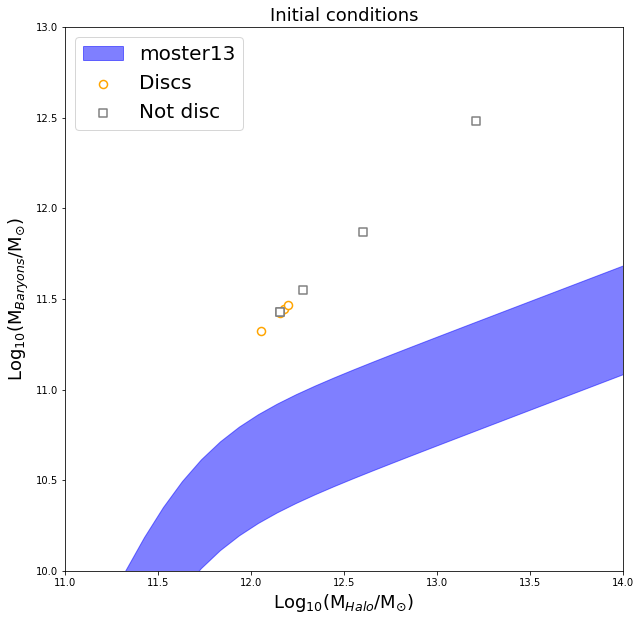

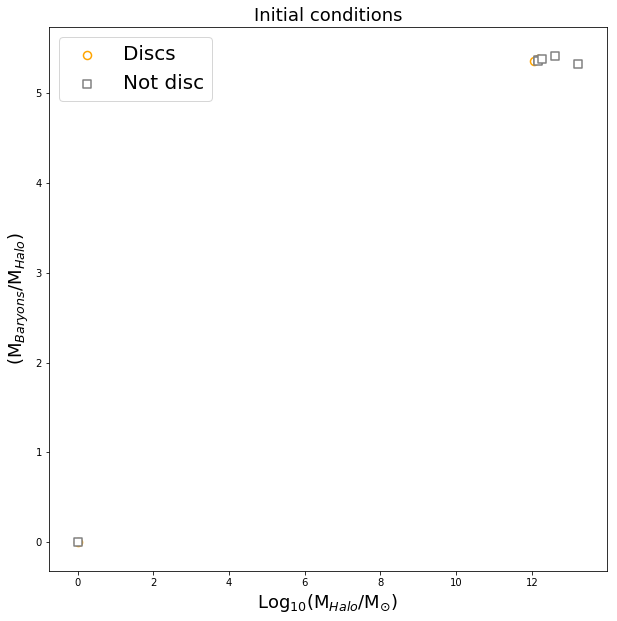

In [23]:
fig, ax1 = plt.subplots(figsize = [10,10])
ax1.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax1.set_ylabel(r'Log$_{10}$(M$_{Baryons}$/M$_{\odot}$)',fontsize=18)
ax1.set_title("Initial conditions",fontsize=18)
ax1.set_xlim(11,14)
ax1.set_ylim(10,13)
markers0 = ['h','o','^','s','p']
ax1.fill_between(np.log10(M), np.log10(m)+.3,np.log10(m)-.3,
                 color='blue',alpha=0.5, label="moster13" )

#ax1.text(12.,12.366,"M*"+r'= M$_{FIRE2}$',fontsize=15)
#ax1.text(11.77,12.366,"M*"+r'= M$_{200}$',fontsize=15)
#ax1.text(12.23,12.366,r'M$_{baryons0}$',fontsize=15)
#ax1.text(12.1,9.5,'M$_{200}$',fontsize=35)

#ax1.scatter(11.75,12.4,marker=markers[0],color = 'b',lw=0,s=90)
#ax1.scatter(11.98,12.4,marker=markers[0],color = 'g',lw=0,s=90)
#ax1.scatter(12.21,12.4,marker=markers[0],color = 'orange',
#            lw=1.2, facecolor='w', s=90)
  


for i in range(len(markers0)-1):
    ax1.scatter(np.log10(initial)[i,0],np.log10(initial)[i,1],
               marker='o',color = 'orange',
                lw=1.5, facecolor='w', s=65)

    
ax1.scatter(0,0,marker='o',color = 'orange',lw=1.5, facecolor='w',
            s=65, label="Discs")
ax1.scatter(0,0,marker="s",color = 'gray',lw=1.5,facecolor='w', 
             s=65, label="Not disc")       
    
for i in range(len(no_disc_initial)):
    ax1.scatter(np.log10(no_disc_initial)[i,0],np.log10(no_disc_initial)[i,1],
                marker="s",color = 'gray',lw=1.5,
                facecolor='w', s=65)

legend = ax1.legend(loc='upper left', ncol=1, shadow=False,
                    fontsize=20)





fig, ax1 = plt.subplots(figsize = [10,10])
ax1.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax1.set_ylabel(r'(M$_{Baryons}$/M$_{Halo}$)',fontsize=18)
ax1.set_title("Initial conditions",fontsize=18)
#ax1.set_xlim(11,14)
#ax1.set_ylim(10,13)
markers0 = ['h','o','^','s','p']
#ax1.fill_between(np.log10(M), np.log10(m)+.3,np.log10(m)-.3,
#                 color='blue',alpha=0.5, label="moster13" )

#ax1.text(12.,12.366,"M*"+r'= M$_{FIRE2}$',fontsize=15)
#ax1.text(11.77,12.366,"M*"+r'= M$_{200}$',fontsize=15)
#ax1.text(12.23,12.366,r'M$_{baryons0}$',fontsize=15)
#ax1.text(12.1,9.5,'M$_{200}$',fontsize=35)

#ax1.scatter(11.75,12.4,marker=markers[0],color = 'b',lw=0,s=90)
#ax1.scatter(11.98,12.4,marker=markers[0],color = 'g',lw=0,s=90)
#ax1.scatter(12.21,12.4,marker=markers[0],color = 'orange',
#            lw=1.2, facecolor='w', s=90)
  


for i in range(len(markers0)-1):
    ax1.scatter(np.log10(initial)[i,0],initial[i,0]/initial[i,1],
               marker='o',color = 'orange',
                lw=1.5, facecolor='w', s=65)

    
ax1.scatter(0,0,marker='o',color = 'orange',lw=1.5, facecolor='w',
            s=65, label="Discs")
ax1.scatter(0,0,marker="s",color = 'gray',lw=1.5,facecolor='w', 
             s=65, label="Not disc")       
    
for i in range(len(no_disc_initial)):
    ax1.scatter(np.log10(no_disc_initial)[i,0],no_disc_initial[i,0]/no_disc_initial[i,1],
                marker="s",color = 'gray',lw=1.5,
                facecolor='w', s=65)

legend = ax1.legend(loc='upper left', ncol=1, shadow=False,
                    fontsize=20)

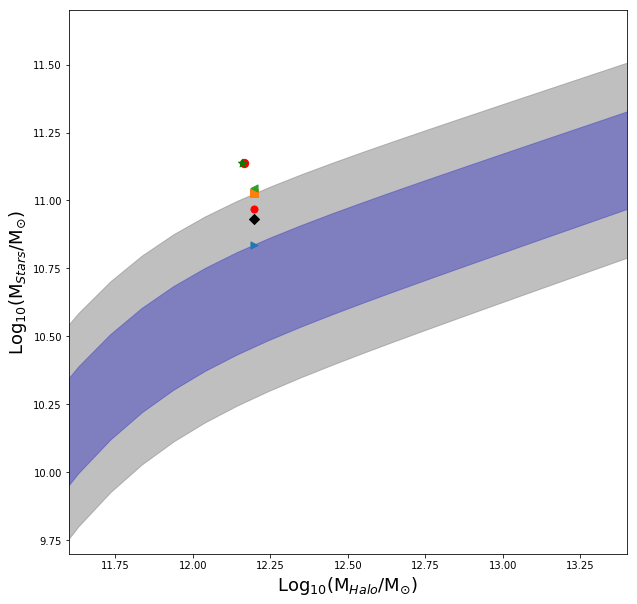

In [24]:
fig, ax1 = plt.subplots(figsize = [10,10])
ax1.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax1.set_ylabel(r'Log$_{10}$(M$_{Stars}$/M$_{\odot}$)',fontsize=18)
ax1.set_xlim(11.6,13.4)
ax1.set_ylim(9.7,11.7)
markers0 = ['h','o','^','s','p','*']
#ax1.fill_between(np.log10(M), np.log10(m)+.3,np.log10(m)-.3,color='blue',alpha=0.5 )
ax1.fill_between(np.log10(M), np.log10(m)+(1./np.log10(np.sqrt(m))),
                 np.log10(m)-(1./np.log10(np.sqrt(m))),color='blue',alpha=0.5 )
ax1.fill_between(np.log10(M), np.log10(m)+(2./np.log10(np.sqrt(m))),
                 np.log10(m)-(2./np.log10(np.sqrt(m))),color='gray',alpha=0.5 )
"""
e01t10
Z = 1.50
| dm mass       =  2.096e+12 M_sun
| stellar mass  =  6.335e+10 M_sun
"""
#ax1.scatter(np.log10(2.096e+12),np.log10(6.335e+10),marker="s",s=20)
"""
e01t20
stellar mass = 4.363e+10
dark matter mass = 2.096e+12
Z = 1.50
"""
#ax1.scatter(np.log10(2.096e+12),np.log10(4.363e+10),marker="D")
"""
e01t30
stellar mass = 3.231e+10
dark matter mass = 2.096e+12
Z = 1.50
"""
#ax1.scatter(np.log10(2.096e+12),np.log10(3.231e+10),marker=">")
"""
e01t10
stellar mass = 9.778e+10
dark matter mass = 1.655e+12
Z = 0.82
"""
#ax1.scatter(np.log10(1.655e+12),np.log10(9.778e+10),marker="s",s=40)
"""
e01t20
stellar mass = 7.575e+10
dark matter mass = 1.655e+12
Z = 0.82
"""
#ax1.scatter(np.log10(1.655e+12),np.log10(7.575e+10),marker="D",s=40)
"""
e01t30
stellar mass = 5.953e+10
dark matter mass = 1.646e+12
Z = 0.82
"""
#ax1.scatter(np.log10(1.655e+12),np.log10(5.953e+10),marker=">",s=40)
"""
e01t30
stellar mass = 6.851e+10
dark matter mass = 1.577e+12
Z = 0.67
"""
ax1.scatter(np.log10(1.577e+12),np.log10(6.851e+10),marker=">",s=50)
"""
e01t10
stellar mass = 1.067e+11
dark matter mass = 1.577e+12
Z = 0.67
"""
ax1.scatter(np.log10(1.577e+12),np.log10(1.067e+11),marker="s",s=50)
"""
e01t20
stellar mass = 8.541e+10
dark matter mass = 1.577e+12
Z = 0.67
"""
ax1.scatter(np.log10(1.577e+12),np.log10(8.541e+10),marker="D",s=50,c='k')
"""
e04t10
stellar mass = 1.112e+11
dark matter mass = 1.576e+12
Z = 0.67
"""
ax1.scatter(np.log10(1.576e+12),np.log10(1.112e+11),marker="<",s=50)
"""
e05t20
stellar mass = 9.314e+10
dark matter mass = 1.576e+12
Z = 0.67
"""
ax1.scatter(np.log10(1.576e+12),np.log10(9.314e+10),marker="o",s=50,c='r')
"""
e05t20
stellar mass = 1.371e+11
dark matter mass = 1.439e+12
Z = 0.00
"""
ax1.scatter(np.log10(1.459e+12),np.log10(1.371e+11),marker="o",s=70,c='r')
"""
e01t10
stellar mass = 1.377e+11
dark matter mass = 1.443e+12
Z = 0.11
"""
ax1.scatter(np.log10(1.443e+12),np.log10(1.377e+11),marker="*",s=70,c='g')


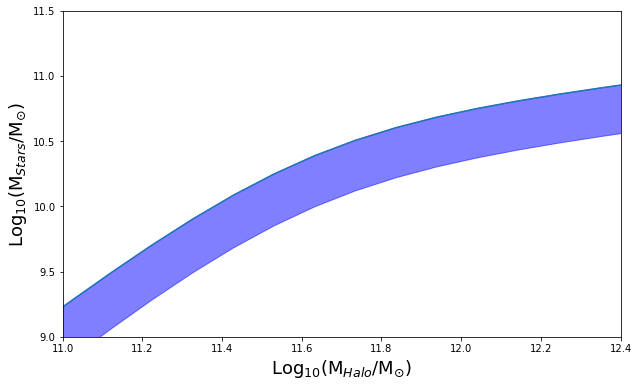

In [25]:
fig, ax1 = plt.subplots(figsize = [10,6])
ax1.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax1.set_ylabel(r'Log$_{10}$(M$_{Stars}$/M$_{\odot}$)',fontsize=18)
ax1.set_xlim(11,12.4)
ax1.set_ylim(9,11.5)
markers0 = ['h','o','^','s','p','*']
ax1.fill_between(np.log10(M), np.log10(m)+(1./np.log10(np.sqrt(m))),
                 np.log10(m)-(1./np.log10(np.sqrt(m))),color='blue',alpha=0.5 )
ax1.plot(np.log10(M), np.log10(m)+(1./np.log10(np.sqrt(m))))

In [26]:
fig, ax1 = plt.subplots(figsize = [10,6])
ax1.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax1.set_ylabel(r'Log$_{10}$(M$_{Stars}$/M$_{Halo}$)',fontsize=18)
#ax1.set_xlim(11,12.4)
#ax1.set_ylim(-2.1,-1.2)
markers0 = ['h','o','^','s','p','*']
ax1.plot(np.log10(M), np.log10(m/M)+(1/np.log10(np.sqrt(m/M))))
ax1.plot(np.log10(M), np.log10(m/M))

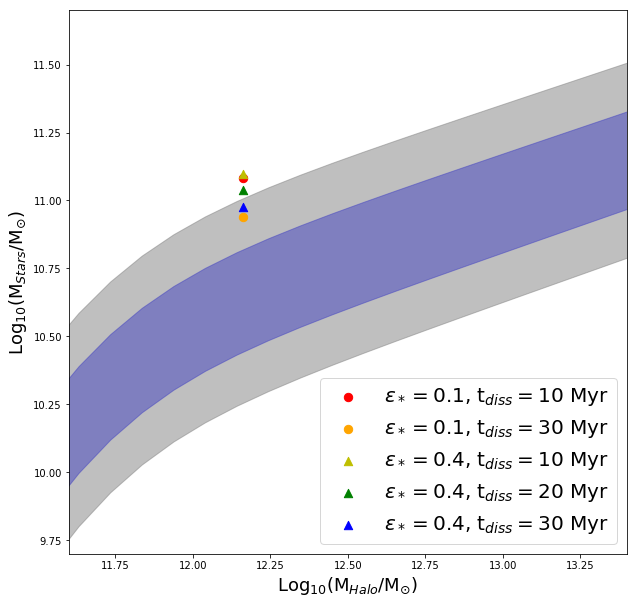

In [27]:
fig, ax1 = plt.subplots(figsize = [10,10])
ax1.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax1.set_ylabel(r'Log$_{10}$(M$_{Stars}$/M$_{\odot}$)',fontsize=18)
ax1.set_xlim(11.6,13.4)
ax1.set_ylim(9.7,11.7)
markers0 = ['h','o','^','s','p','*']
#ax1.fill_between(np.log10(M), np.log10(m)+.3,np.log10(m)-.3,color='blue',alpha=0.5 )
ax1.fill_between(np.log10(M), np.log10(m)+(1./np.log10(np.sqrt(m))),
                 np.log10(m)-(1./np.log10(np.sqrt(m))),color='blue',alpha=0.5 )
ax1.fill_between(np.log10(M), np.log10(m)+(2./np.log10(np.sqrt(m))),
                 np.log10(m)-(2./np.log10(np.sqrt(m))),color='gray',alpha=0.5 )
"""
e01_t10
stellar mass = 1.210e+11
dark matter mass = 1.453e+12
Z = 0.38
"""
ax1.scatter(np.log10(1.453e+12),np.log10(1.210e+11),
            marker="o",s=70,c='r',
            label=r"$\epsilon_* = 0.1$, t$_{diss} = 10 $ Myr")
"""
e01_t30
stellar mass = 8.660e+10
dark matter mass = 1.453e+12
Z = 0.38
"""
ax1.scatter(np.log10(1.453e+12),np.log10(8.66e10),
            marker="o",s=70,c='orange',
            label=r"$\epsilon_* = 0.1$, t$_{diss} = 30 $ Myr")
"""
e04_t10
stellar mass = 1.256e+11
dark matter mass = 1.453e+12
Z = 0.38
"""
ax1.scatter(np.log10(1.453e+12),np.log10(1.256e11),
            marker="^",s=70,c='y',
            label=r"$\epsilon_* = 0.4$, t$_{diss} = 10 $ Myr")
"""
e04t20
stellar mass = 1.092e+11
dark matter mass = 1.453e+12
Z = 0.38
"""
ax1.scatter(np.log10(1.453e+12),np.log10(1.092e11),
            marker="^",s=70,c='g',
            label=r"$\epsilon_* = 0.4$, t$_{diss} = 20 $ Myr")
"""
e04t30
stellar mass = 9.428e+10
dark matter mass = 1.453e+12
Z = 0.38
"""
ax1.scatter(np.log10(1.453e+12),np.log10(9.428e10),
            marker="^",s=70,c='blue',
            label=r"$\epsilon_* = 0.4$, t$_{diss} = 30 $ Myr")
legend = ax1.legend(loc='lower right', ncol=1, shadow=False,
                    fontsize=20)

In [28]:
f = open('AquariusMWlikes.txt')
Aqsimname = AqM_star = AqM_halo = np.array([]) 
for l in f:
    row = l.split(' ')
    if row[0]=='#':
        continue
    Aqsimname = np.append(Aqsimname,row[0])
    AqM_star = np.append(AqM_star,np.float(row[4])*1e10)
    AqM_halo = np.append(AqM_halo,np.float(row[5])*1e10)
    

In [29]:
f = open('EagleApostleMWgals.txt')
simname = M_star = M_halo = np.array([]) 
for l in f:
    row = l.split(' ')
    if row[0]=='#':
        continue
    simname = np.append(simname,row[0])
    M_star = np.append(M_star,np.float(row[1])*1e10)
    M_halo = np.append(M_halo,np.float(row[2])*1e12)
    

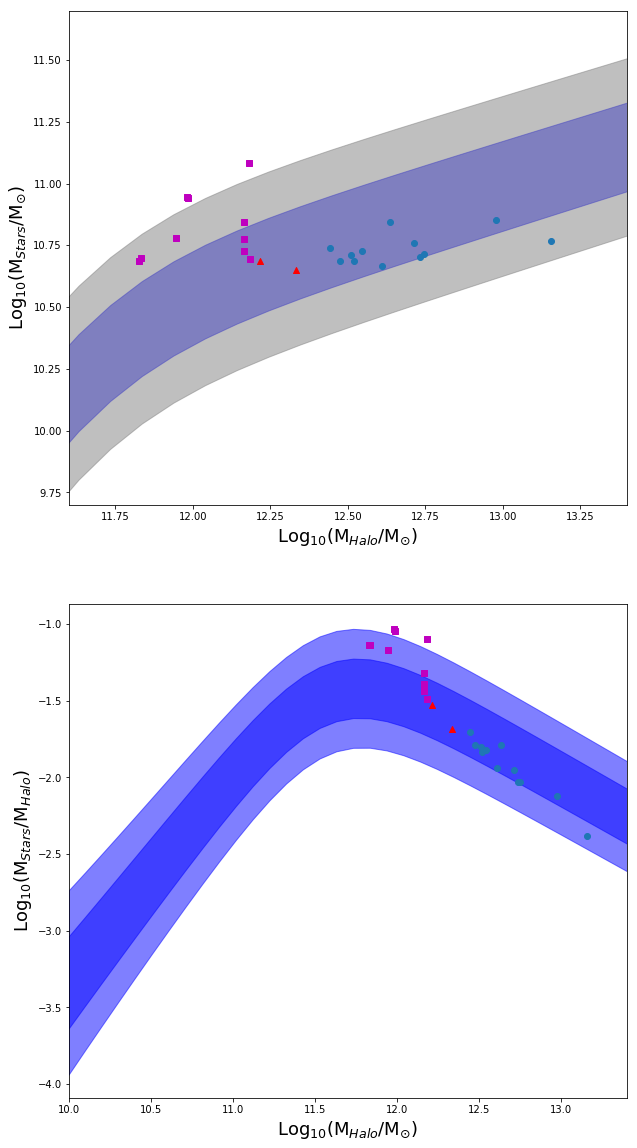

In [30]:
fig, [ax1,ax2] = plt.subplots(2,1,figsize = [10,20])
ax1.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax1.set_ylabel(r'Log$_{10}$(M$_{Stars}$/M$_{\odot}$)',fontsize=18)
ax1.set_xlim(11.6,13.4)
ax1.set_ylim(9.7,11.7)
markers0 = ['h','o','^','s','p','*']
#ax1.fill_between(np.log10(M), np.log10(m)+.3,np.log10(m)-.3,color='blue',alpha=0.5 )
ax1.fill_between(np.log10(M), np.log10(m)+(1./np.log10(np.sqrt(m))),
                 np.log10(m)-(1./np.log10(np.sqrt(m))),color='blue',alpha=0.5 )
ax1.fill_between(np.log10(M), np.log10(m)+(2./np.log10(np.sqrt(m))),
                 np.log10(m)-(2./np.log10(np.sqrt(m))),color='gray',alpha=0.5 )
ax1.scatter(np.log10(M_halo[:-2]),np.log10(M_star[:-2]))
ax1.scatter(np.log10(M_halo[-2:]),np.log10(M_star[-2:]),marker="^",c='r')
ax1.scatter(np.log10(AqM_halo),np.log10(AqM_star),marker="s",c='m')

ax2.set_xlim(10,13.4)
ax2.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax2.set_ylabel(r'Log$_{10}$(M$_{Stars}$/M$_{Halo}$)',fontsize=18)
ax2.fill_between(np.log10(M), np.log10(m/M)+(1./np.log10(np.sqrt(m))),
                 np.log10(m/M)-(1./np.log10(np.sqrt(m))),color='blue',alpha=0.5 )
ax2.fill_between(np.log10(M), np.log10(m/M)+(2./np.log10(np.sqrt(m))),
                 np.log10(m/M)-(2./np.log10(np.sqrt(m))),color='blue',alpha=0.5 )
ax2.scatter(np.log10(M_halo[:-2]),np.log10(M_star[:-2]/M_halo[:-2]))
ax2.scatter(np.log10(M_halo[-2:]),np.log10(M_star[-2:]/M_halo[-2:]),marker="^",c='r')
ax2.scatter(np.log10(AqM_halo),np.log10(AqM_star/AqM_halo),marker="s",c='m')

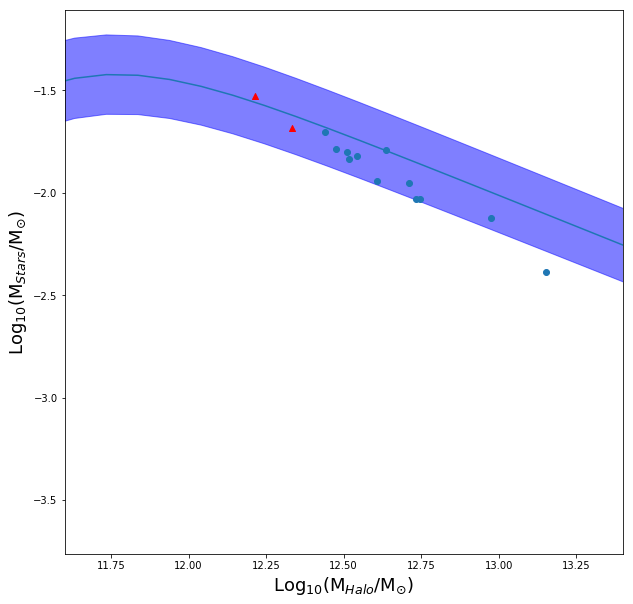

In [31]:
fig, ax1 = plt.subplots(figsize = [10,10])
ax1.set_xlim(11.6,13.4)
ax1.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax1.set_ylabel(r'Log$_{10}$(M$_{Stars}$/M$_{\odot}$)',fontsize=18)
ax1.fill_between(np.log10(M), np.log10(m/M)+(1./np.log10(np.sqrt(m))),
                 np.log10(m/M)-(1./np.log10(np.sqrt(m))),color='blue',alpha=0.5 )
markers0 = ['h','o','^','s','p','*']
ax1.plot(np.log10(M), np.log10(m/M))
ax1.scatter(np.log10(M_halo[:-2]),np.log10(M_star[:-2]/M_halo[:-2]))
ax1.scatter(np.log10(M_halo[-2:]),np.log10(M_star[-2:]/M_halo[-2:]),marker="^",c='r')


# Rodriguez-Puebla 

In [32]:
def M_st_RP(M):
    def P(x,y,z):return y*z - x*z/1+z
    def Q(z): return np.exp(-4/(1+z)**2)
    Z = 0.
    log_ep = (-1.758) + P(0.11, -0.061,Z)*Q(Z) + P(-0.023,0.,0.)
    log_M0 = 11.548 + P(-1.297,-0.026,Z)*Q(Z)
    al = 1.975 + P(0.714,0.042,Z)*Q(Z)
    de = 3.390 + P(-0.472,-0.931,Z)*Q(Z) 
    ga = 0.498 + P(-0.157,0.,Z)*Q(Z)
    def g(x): 
        first = de * ((np.log10(1.+np.exp(x)))**ga)/(1.+np.exp(10.**-x))
        second = np.log10(1. + 10.**(-al*x))
        return first - second
    M0 = 10**log_M0
    return log_ep + log_M0 + g(np.log10(M/M0)) - g(0)


# Kravtsov


In [33]:
def M_st_K(M):
    """
    SHMR from kravtsov et al 2014 https://arxiv.org/abs/1401.7329
    """
    M1, ep, al, de, ga   = 10**(11.39), 10**(-1.618), 1.795, 4.345, 0.619
    #M1, ep, al, de, ga   = 10**11.45, 10**(-1.702), 1.736, 4.273, 0.613
    def f(x):
        second_up = ((np.log10(1.+np.exp(x)))**ga)
        second_down = (1.+np.exp(10**(-x)))
        return -np.log10(10**(-al*x)+1)+ (de*second_up / second_down)
    return np.log10(ep*M1) + f(np.log10(M/M1)) - f(0)

# Behroozi, Wechsler & Conroy

In [34]:
def M_st_B(M):
    def P(x,y,z):return y*z - x*z/1+z
    def Q(z): return np.exp(-4/(1+z)**2)
    Z = 0.
    log_ep = -1.777
    log_M0 = 11.514 
    al = -1.412
    de = 3.508
    ga = 0.316
    def g(x): 
        first = de * ((np.log10(1.+np.exp(x)))**ga)/(1.+np.exp(10.**-x))
        second = np.log10(1. + 10.**(al*x))
        return first - second
    M0 = 10**log_M0
    return log_ep + log_M0 + g(np.log10(M/M0)) - g(0)

In [35]:
sims = np.genfromtxt("../../datafiles/q_mass_and_dmmass.txt",delimiter=",")
print sims[:,0]

[-1.9302 -0.0534 -0.2392  0.6217  0.6327  0.6408]


0.01736163191840408


Text(0,0.5,'M$_{Stars}$/M$_{Halo}$($\\Omega_b / \\Omega_m $)$^{-1}$')

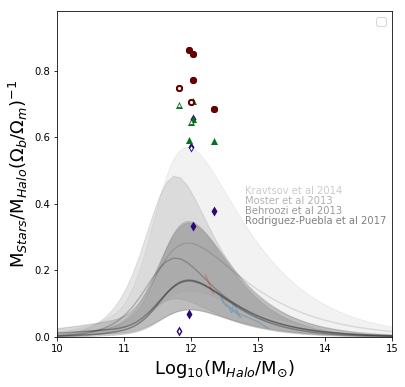

In [36]:
fig, ax = plt.subplots(figsize=[6,6])
ax.set_xlim([10,15])
ax.set_ylim([0,0.98])

M_H = np.logspace(10,15,100)

rod = 10**M_st_RP(M_H)/M_H/0.16
rod1 = 10**(M_st_RP(M_H)+(1/np.sqrt(M_st_RP(M_H)))) /M_H/0.16
rod2 = 10**(M_st_RP(M_H)-(1/np.sqrt(M_st_RP(M_H)))) /M_H/0.16

kra = 10**M_st_K(M_H)/M_H/0.16
kra1 = 10**(M_st_K(M_H)+(1/np.sqrt(M_st_K(M_H)))) /M_H/0.16
kra2 = 10**(M_st_K(M_H)-(1/np.sqrt(M_st_K(M_H)))) /M_H/0.16

beh = (10**M_st_B(M_H)/M_H)/0.16
beh1 = 10**(M_st_B(M_H)+(1/np.sqrt(M_st_B(M_H)))) /M_H/0.16
beh2 = 10**(M_st_B(M_H)-(1/np.sqrt(M_st_B(M_H)))) /M_H/0.16

mos = m/M/0.16
mos1 = 10**(np.log10(m)+(1/np.sqrt(np.log10(m))))/M/0.16
mos2 = 10**(np.log10(m)-(1/np.sqrt(np.log10(m))))/M/0.16


ax.fill_between(np.log10(M_H), kra2,kra1,color='gray',alpha=0.1 )
ax.plot(np.log10(M_H),kra,"k",alpha=0.1)

ax.fill_between(np.log10(M), mos2,mos1,color='gray',alpha=0.2 )
ax.plot(np.log10(M),mos,"k",alpha=0.2)

ax.fill_between(np.log10(M_H), beh2,beh1,color='gray',alpha=0.3 )
ax.plot(np.log10(M_H),beh,"k",alpha=0.3)


ax.fill_between(np.log10(M_H), rod2,rod1,color='gray',alpha=0.3 )
ax.plot(np.log10(M_H),rod,"k",alpha=0.3)


######### points
#M200
ax.scatter(np.log10(sims[:,8]),sims[:,6]/sims[:,8]/0.16,lw=0,
           marker="o",s=50,c="#660000")
#halob
ax.scatter(np.log10(sims[1,8]),sims[1,6]/sims[1,8]/0.16,lw=0,marker="o",s=10,c="w")
#mochima
ax.scatter(np.log10(sims[3,8]),sims[3,6]/sims[3,8]/0.16,lw=0,
           marker="o",s=10,c="w")
#M_fire
ax.scatter(np.log10(sims[:,8]),sims[:,5]/sims[:,8]/0.16,lw=0,
           marker="d",s=50,c="#2a0972")
#halob
shi=0.001
ax.scatter(np.log10(sims[1,8]),(sims[1,5]/sims[1,8]/0.16)-shi,lw=0,marker="d",s=10,c="w")
#mochima
ax.scatter(np.log10(sims[3,8]),(sims[3,5]/sims[3,8]/0.16)-shi,lw=0,marker="d",s=10,c="w")

#M_17
ax.scatter(np.log10(sims[:,8]),sims[:,7]/sims[:,8]/0.16,lw=0,
           marker="^",s=50,c="#097220")
#halob
shi=0.001
ax.scatter(np.log10(sims[1,8]),(sims[1,7]/sims[1,8]/0.16)-shi,lw=0,marker="^",s=10,c="w")
#mochima
ax.scatter(np.log10(sims[3,8]),(sims[3,7]/sims[3,8]/0.16)-shi,lw=0,marker="^",s=10,c="w")

#M200
ax.scatter(np.log10(sims[:,8]),sims[:,6]/sims[:,8]/0.16,lw=0,
           marker="o",s=50,c="#660000")
#halob
ax.scatter(np.log10(sims[1,8]),sims[1,6]/sims[1,8]/0.16,lw=0,marker="o",s=10,c="w")
#mochima
ax.scatter(np.log10(sims[3,8]),sims[3,6]/sims[3,8]/0.16,lw=0,
           marker="o",s=10,c="w")

ax.text(12.8, 0.43, "Kravtsov et al 2014",color="gray",alpha=0.4)
ax.text(12.8, 0.4, "Moster et al 2013",color="gray",alpha=0.6)
ax.text(12.8, 0.37, "Behroozi et al 2013",color="gray",alpha=0.8)
ax.text(12.8, 0.34, "Rodriguez-Puebla et al 2017",color="gray",alpha=1)
ax.plot(np.log10(M_halo[:-2]),M_star[:-2]/M_halo[:-2]/0.16,lw=1.2,alpha=0.3)#,label="Eagle Simulation")
ax.plot(np.log10(M_halo[-2:]),M_star[-2:]/M_halo[-2:]/0.16,lw=1.2,alpha=0.3,c='r')#,label="Apostle Simulation")

print (sims[1,5]/sims[1,8]/0.16)


legend = ax.legend(loc='upper right', ncol=1,shadow=False,
                    fontsize=12)
ax.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax.set_ylabel(r'M$_{Stars}$/M$_{Halo}$($\Omega_b / \Omega_m $)$^{-1}$',fontsize=18)

Text(0,0.5,'$\\rm q$')

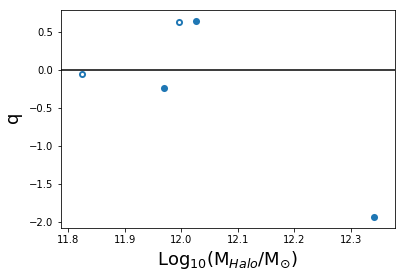

In [37]:
fig, ax =plt.subplots()
ax.axhline(y=0,color='k')
ax.scatter(np.log10(sims[:-1,8]),sims[:-1,0],marker='o',s=50,lw=0)
#halob
ax.scatter(np.log10(sims[1,8]),sims[1,0],lw=0,marker="o",s=10,c="w")
#mochima
ax.scatter(np.log10(sims[3,8]),sims[3,0],lw=0,marker="o",s=10,c="w")


ax.set_xlabel(r'$\rm Log$$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax.set_ylabel(r'$\rm q$',fontsize=18)


0.01736163191840408
11.91460756777108 0.893944004869


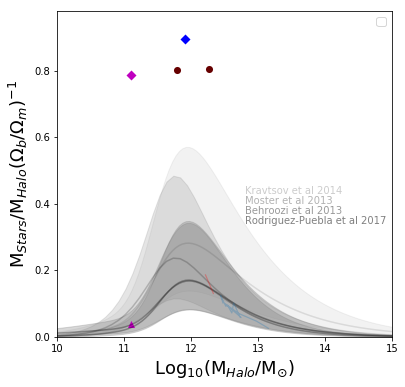

In [38]:
fig, ax = plt.subplots(figsize=[6,6])
ax.set_xlim([10,15])
ax.set_ylim([0,0.98])

M_H = np.logspace(10,15,100)

rod = 10**M_st_RP(M_H)/M_H/0.16
rod1 = 10**(M_st_RP(M_H)+(1/np.sqrt(M_st_RP(M_H)))) /M_H/0.16
rod2 = 10**(M_st_RP(M_H)-(1/np.sqrt(M_st_RP(M_H)))) /M_H/0.16

kra = 10**M_st_K(M_H)/M_H/0.16
kra1 = 10**(M_st_K(M_H)+(1/np.sqrt(M_st_K(M_H)))) /M_H/0.16
kra2 = 10**(M_st_K(M_H)-(1/np.sqrt(M_st_K(M_H)))) /M_H/0.16

beh = (10**M_st_B(M_H)/M_H)/0.16
beh1 = 10**(M_st_B(M_H)+(1/np.sqrt(M_st_B(M_H)))) /M_H/0.16
beh2 = 10**(M_st_B(M_H)-(1/np.sqrt(M_st_B(M_H)))) /M_H/0.16

mos = m/M/0.16
mos1 = 10**(np.log10(m)+(1/np.sqrt(np.log10(m))))/M/0.16
mos2 = 10**(np.log10(m)-(1/np.sqrt(np.log10(m))))/M/0.16


ax.fill_between(np.log10(M_H), kra2,kra1,color='gray',alpha=0.1 )
ax.plot(np.log10(M_H),kra,"k",alpha=0.1)

ax.fill_between(np.log10(M), mos2,mos1,color='gray',alpha=0.2 )
ax.plot(np.log10(M),mos,"k",alpha=0.2)

ax.fill_between(np.log10(M_H), beh2,beh1,color='gray',alpha=0.3 )
ax.plot(np.log10(M_H),beh,"k",alpha=0.3)


ax.fill_between(np.log10(M_H), rod2,rod1,color='gray',alpha=0.3 )
ax.plot(np.log10(M_H),rod,"k",alpha=0.3)


######### points
#M200
ax.scatter(np.log10(62e10),7.96e10/62e10/0.16,lw=0,
           marker="o",s=50,c="#660000")
#halob
ax.scatter(np.log10(186e10),23.96e10/186e10/0.16,lw=0,
           marker="o",s=50,c="#660000")
#haloa

8.105e+11
ax.scatter(np.log10(8.215e11),1.175e11/8.215e11/0.16,lw=0,marker="D",s=50,c="b")
#mochima

ax.scatter(np.log10(8.105e+11),8e+11/8.105e+11/0.16,lw=0,marker="D",s=50,c="b")
#adicora
ax.scatter(11.1,10**10.2/10**11.1/0.16,lw=0,marker="D",s=50,c="m")
ax.scatter(11.1,10**8.9/10**11.1/0.16,lw=0,marker="^",s=50,c="m")


"""
ax.scatter(np.log10(sims[3,8]),sims[3,6]/sims[3,8]/0.16,lw=0,
           marker="o",s=10,c="w")
#M_fire
ax.scatter(np.log10(sims[:,8]),sims[:,5]/sims[:,8]/0.16,lw=0,
           marker="d",s=50,c="#2a0972")
#halob
shi=0.001
ax.scatter(np.log10(sims[1,8]),(sims[1,5]/sims[1,8]/0.16)-shi,lw=0,marker="d",s=10,c="w")
#mochima
ax.scatter(np.log10(sims[3,8]),(sims[3,5]/sims[3,8]/0.16)-shi,lw=0,marker="d",s=10,c="w")

#M_17
ax.scatter(np.log10(sims[:,8]),sims[:,7]/sims[:,8]/0.16,lw=0,
           marker="^",s=50,c="#097220")
#halob
shi=0.001
ax.scatter(np.log10(sims[1,8]),(sims[1,7]/sims[1,8]/0.16)-shi,lw=0,marker="^",s=10,c="w")
#mochima
ax.scatter(np.log10(sims[3,8]),(sims[3,7]/sims[3,8]/0.16)-shi,lw=0,marker="^",s=10,c="w")

#M200
ax.scatter(np.log10(sims[:,8]),sims[:,6]/sims[:,8]/0.16,lw=0,
           marker="o",s=50,c="#660000")
#halob
ax.scatter(np.log10(sims[1,8]),sims[1,6]/sims[1,8]/0.16,lw=0,marker="o",s=10,c="w")
#mochima
ax.scatter(np.log10(sims[3,8]),sims[3,6]/sims[3,8]/0.16,lw=0,
           marker="o",s=10,c="w")
"""
ax.text(12.8, 0.43, "Kravtsov et al 2014",color="gray",alpha=0.4)
ax.text(12.8, 0.4, "Moster et al 2013",color="gray",alpha=0.6)
ax.text(12.8, 0.37, "Behroozi et al 2013",color="gray",alpha=0.8)
ax.text(12.8, 0.34, "Rodriguez-Puebla et al 2017",color="gray",alpha=1)
ax.plot(np.log10(M_halo[:-2]),M_star[:-2]/M_halo[:-2]/0.16,lw=1.2,alpha=0.3)#,label="Eagle Simulation")
ax.plot(np.log10(M_halo[-2:]),M_star[-2:]/M_halo[-2:]/0.16,lw=1.2,alpha=0.3,c='r')#,label="Apostle Simulation")

print (sims[1,5]/sims[1,8]/0.16)


legend = ax.legend(loc='upper right', ncol=1,shadow=False,
                    fontsize=12)
ax.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax.set_ylabel(r'M$_{Stars}$/M$_{Halo}$($\Omega_b / \Omega_m $)$^{-1}$',fontsize=18)

print (np.log10(8.215e11)), 1.175e11/8.215e11/0.16

In [104]:
M = np.logspace(10,15,50)
m0 = mm(M,z=0.8)

m1 = mm(M,z=0.8)
al = np.sqrt(m)#alpha(m)

In [105]:

SF0DIst = 2.210e+10
SF0DIst02 = 2.006e+10
SF0DIdm = 3.405e+11

SF1DIst = 3.658e+10
SF1DIst02 = 3.396e+10
SF1DIdm = 3.684e+11

SF1MIst = 5.747e+10
SF1MIst02 = 4.925e+10
SF1MIdm = 3.784e+11



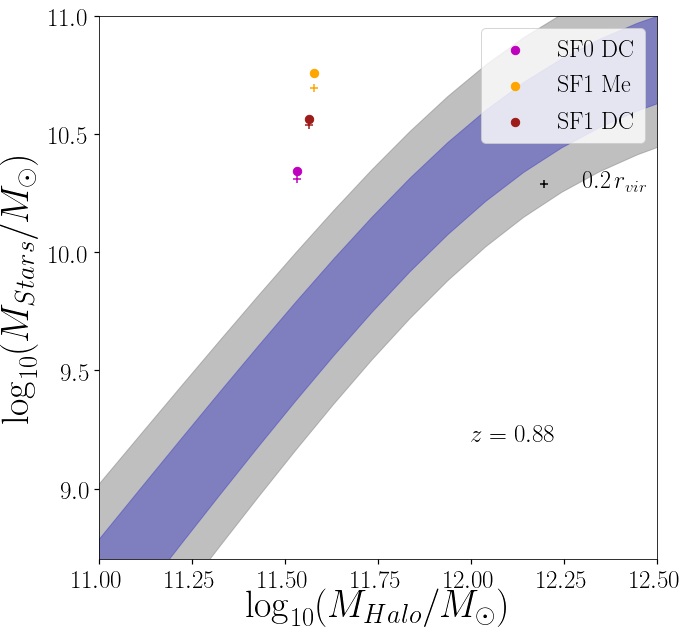

In [177]:
fig, ax1 = plt.subplots(figsize = [10,10])
ax1.set_xlabel(r'$  \log_{10}(M_{Halo}/M_{\odot})$',fontsize=38)
ax1.set_ylabel(r'$  \log_{10}(M_{Stars}/M_{\odot})$',fontsize=38)
ax1.set_xlim(11.,12.5)
ax1.set_ylim(8.7,11.)
markers0 = ['h','o','^','s','p','*']
#ax1.fill_between(np.log10(M), np.log10(m)+.3,np.log10(m)-.3,color='blue',alpha=0.5 )
ax1.fill_between(np.log10(M), np.log10(m1)+(1./np.log10(np.sqrt(m1))),
                 np.log10(m1)-(1./np.log10(np.sqrt(m1))),color='blue',alpha=0.5 )
ax1.fill_between(np.log10(M), np.log10(m1)+(2./np.log10(np.sqrt(m1))),
                 np.log10(m1)-(2./np.log10(np.sqrt(m1))),color='gray',alpha=0.5 )
size=70
ax1.scatter(np.log10(SF0DIdm),np.log10(SF0DIst),color='m',marker='o',s=size,label=r"$\rm SF0\;DC$")
ax1.scatter(np.log10(SF0DIdm),np.log10(SF0DIst02),color='m',s=size,marker='+')
ax1.scatter(np.log10(SF1MIdm),np.log10(SF1MIst),color='orange',s=size,marker='o',label=r"$\rm SF1\;Me$")
ax1.scatter(np.log10(SF1MIdm),np.log10(SF1MIst02),color='orange',s=size,marker='+')

ax1.scatter(np.log10(SF1DIdm),np.log10(SF1DIst),color='#9d1b19',s=size,marker='o',label=r"$\rm SF1\;DC$")
ax1.scatter(np.log10(SF1DIdm),np.log10(SF1DIst02),color='#9d1b19',s=size,marker='+')

ax1.text(12,9.2,r"$ z=0.88$",fontsize=25)

ax1.scatter(12.198,10.29,color='k',marker='+',s=size)

ax1.text(12.3,10.26,r"$ 0.2 \, r_{vir}$",fontsize=24)

legend = ax1.legend(loc='upper right', ncol=1, shadow=False, fontsize=24)
frame = legend.get_frame()
tickssize=25
ax1.tick_params(axis='both', which='major', labelsize=tickssize, size=5,width=1.2)
ax1.tick_params(axis='both', which='minor', labelsize=tickssize, size=3,width=1.2)

In [140]:


SF0DIst = 2.210e+10
SF0DIst02 = 2.036e+10
SF0DIdm = 3.405e+11




SF1DIst = 3.658e+10
SF1DIst02 = 3.436e+10
SF1DIdm = 3.684e+11


SF1MIst = 5.747e+10
SF1MIst02 = 4.925e+10
SF1MIdm = 3.784e+11

SF1MIst  = 5.747e+10
SF1MIst02  = 4.966e+10
SF1MIdm  = 3.784e+11

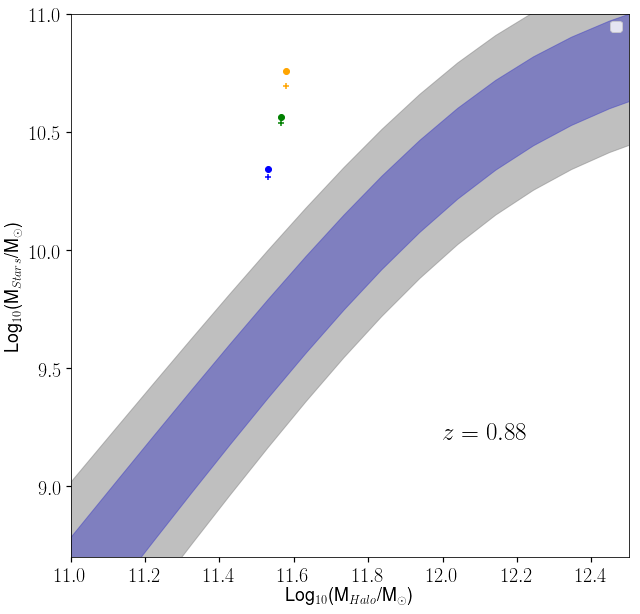

In [141]:
fig, ax1 = plt.subplots(figsize = [10,10])
ax1.set_xlabel(r'Log$_{10}$(M$_{Halo}$/M$_{\odot}$)',fontsize=18)
ax1.set_ylabel(r'Log$_{10}$(M$_{Stars}$/M$_{\odot}$)',fontsize=18)
ax1.set_xlim(11.,12.5)
ax1.set_ylim(8.7,11.)
markers0 = ['h','o','^','s','p','*']
#ax1.fill_between(np.log10(M), np.log10(m)+.3,np.log10(m)-.3,color='blue',alpha=0.5 )
ax1.fill_between(np.log10(M), np.log10(m1)+(1./np.log10(np.sqrt(m1))),
                 np.log10(m1)-(1./np.log10(np.sqrt(m1))),color='blue',alpha=0.5 )
ax1.fill_between(np.log10(M), np.log10(m1)+(2./np.log10(np.sqrt(m1))),
                 np.log10(m1)-(2./np.log10(np.sqrt(m1))),color='gray',alpha=0.5 )

ax1.scatter(np.log10(SF0DIdm),np.log10(SF0DIst),color='b',marker='o')
ax1.scatter(np.log10(SF0DIdm),np.log10(SF0DIst02),color='b',marker='+')
ax1.scatter(np.log10(SF1MIdm),np.log10(SF1MIst),color='orange',marker='o')
ax1.scatter(np.log10(SF1MIdm),np.log10(SF1MIst02),color='orange',marker='+')

ax1.scatter(np.log10(SF1DIdm),np.log10(SF1DIst),color='g',marker='o')
ax1.scatter(np.log10(SF1DIdm),np.log10(SF1DIst02),color='g',marker='+')

ax1.text(12,9.2,r"$ z=0.88$",fontsize=25)
legend = ax1.legend(loc='upper right', ncol=1, shadow=False, fontsize=14)
frame = legend.get_frame()
tickssize=20
ax1.tick_params(axis='both', which='major', labelsize=tickssize, size=5,width=1.2)
ax1.tick_params(axis='both', which='minor', labelsize=tickssize, size=3,width=1.2)